In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import itertools

In [2]:
DATA_DIR = "./"
DATA_FILENAMES = {"bluetooth": "bt_symmetric.csv",
                  "calls": "calls.csv",
                  "sms": "sms.csv",
                  "facebook_friends": "fb_friends.csv",
                  "genders": "genders.csv"}

In [3]:
def LoadData(data_filename, data_dir):
    '''Loads data from |data_dir|/|data_filename|. Returns Pandas dataframe.'''
    return pd.read_csv(os.path.join(data_dir, data_filename))  

In [4]:
df_sms = LoadData(DATA_FILENAMES["sms"], DATA_DIR)
print("\nsms\n", df_sms.head())


sms
    timestamp  sender  recipient
0         18     370        512
1         37     512        370
2        126     370        512
3        134       0        512
4        312     137        136


### SMS analysis

In [5]:
DF_sms = df_sms
DF_sms["hour"] = DF_sms["timestamp"]// (3600) + 1
DF_sms["day"] = DF_sms["timestamp"]// (3600*24) + 1
DF_sms["week"] = DF_sms["timestamp"]// (3600*24*7) + 1
DF_sms["weight"] = np.ones(len(DF_sms))


DF_sms

,timestamp,sender,recipient,hour,day,week,weight
0,18,370,512,1,1,1,1.0
1,37,512,370,1,1,1,1.0
2,126,370,512,1,1,1,1.0
3,134,0,512,1,1,1,1.0
4,312,137,136,1,1,1,1.0
...,...,...,...,...,...,...,...
24328,2415198,238,26,671,28,4,1.0
24329,2416413,137,136,672,28,4,1.0
24330,2417238,136,137,672,28,4,1.0
24331,2417633,323,392,672,28,4,1.0


### DEGREE IN OUT

### WEEKLY 

Text(0.5, 0.98, 'SMS weekly distribution network')

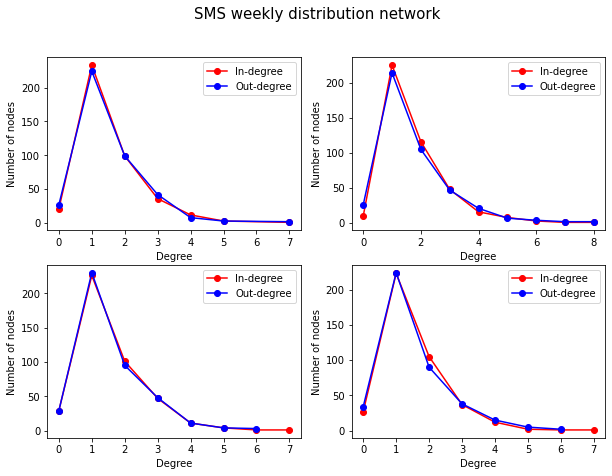

In [6]:
sms_week =  DF_sms[["sender","recipient","week","weight"]].groupby(["sender","recipient","week"]).sum().reset_index()
sms_week = sms_week.sort_values(by=['week']).reset_index(drop=True)
sms_week


fig, ax = plt.subplots(2,2,figsize=(10,7))

for i,a in enumerate(ax.flatten()):
    app = sms_week[sms_week["week"] == i+1]
    G_sms = nx.from_pandas_edgelist(app,
                    source='sender',target='recipient',edge_attr='weight', create_using=nx.DiGraph())

    nnodes = G_sms.number_of_nodes()
    degrees_in = [d for n, d in G_sms.in_degree()]
    degrees_out = [d for n, d in G_sms.out_degree()]
    avrg_degree_in = sum(degrees_in) / float(nnodes)
    avrg_degree_out = sum(degrees_out) / float(nnodes)

    in_values = sorted(set(degrees_in))
    in_hist = [degrees_in.count(x) for x in in_values]
    out_values = sorted(set(degrees_out))
    out_hist = [degrees_out.count(x) for x in out_values]


    a.plot(in_values,in_hist,'ro-') # in-degree
    a.plot(out_values,out_hist,'bo-') # out-degree
    a.legend(['In-degree','Out-degree'])
    a.set_xlabel('Degree')
    a.set_ylabel('Number of nodes')
fig.suptitle('SMS weekly distribution network', fontsize=15)

### TOTAL

In [7]:
sms_total =  DF_sms[["sender","recipient","weight"]].groupby(["sender","recipient"]).sum().reset_index()
sms_total

,sender,recipient,weight
0,0,208,1.0
1,0,512,61.0
2,1,345,2.0
3,3,49,41.0
4,3,217,3.0
...,...,...,...
1298,845,256,1.0
1299,846,191,1.0
1300,846,291,10.0
1301,846,374,2.0


Text(0.5, 1.0, 'SMS total distribution network')

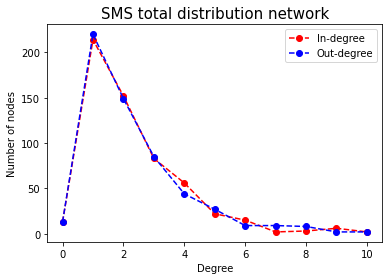

In [8]:
G_sms = nx.from_pandas_edgelist(sms_total,
                source='sender',target='recipient',edge_attr='weight', create_using=nx.DiGraph())

nnodes = G_sms.number_of_nodes()
degrees_in = [d for n, d in G_sms.in_degree()]
degrees_out = [d for n, d in G_sms.out_degree()]
avrg_degree_in = sum(degrees_in) / float(nnodes)
avrg_degree_out = sum(degrees_out) / float(nnodes)

in_values = sorted(set(degrees_in))
in_hist = [degrees_in.count(x) for x in in_values]
out_values = sorted(set(degrees_out))
out_hist = [degrees_out.count(x) for x in out_values]


#plt.plot(in_values,sum(in_hist)-np.cumsum(in_hist),'ro--') # in-degree
#plt.plot(out_values,sum(out_hist)-np.cumsum(out_hist),'bo--') # out-degree

plt.plot(in_values,in_hist,'ro--') # in-degree
plt.plot(out_values,out_hist,'bo--') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('SMS total distribution network', fontsize=15)


Text(0, 0.5, 'Number of component')

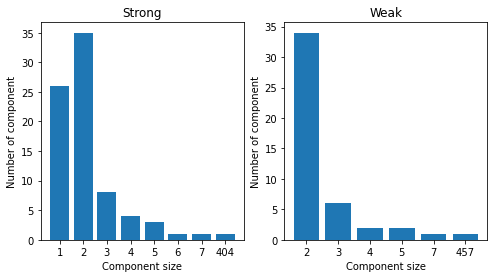

In [9]:
fig, ax = plt.subplots(1,2,figsize=(8,4))


strong_com = list(nx.strongly_connected_components(G_sms))
weak_com = list(nx.weakly_connected_components(G_sms))
strong = []
weak = []
for c in strong_com:
    strong.append(len(c))
for c in weak_com:
    weak.append(len(c))
x,y = np.unique(strong,return_counts=True)  
ax[0].bar([str(i) for i in x],y)
ax[0].set_title("Strong")
ax[0].set_xlabel("Component size")
ax[0].set_ylabel("Number of component")

x,y = np.unique(weak,return_counts=True)  
ax[1].bar([str(i) for i in x],y)
ax[1].set_title("Weak")
ax[1].set_xlabel("Component size")
ax[1].set_ylabel("Number of component")


## DISTRIBUTION OF WEIGHTS

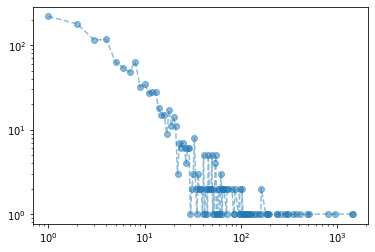

In [10]:
x,y = np.unique(sms_total.weight, return_counts=True)
plt.plot(x,y,'o--',alpha=0.5)
plt.xscale("log")
plt.yscale("log")


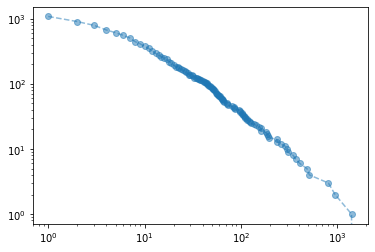

In [11]:
plt.plot(x,y.sum() - np.cumsum(y),'o--',alpha=0.5)
plt.xscale("log")
plt.yscale("log")


## DEGREE CENTRALITY

In [12]:
deg = nx.degree_centrality(G_sms)
sorted(deg,key=deg.get,reverse=True)[:10]

[176, 221, 100, 485, 371, 401, 457, 13, 268, 598]

In [13]:
in_deg = nx.in_degree_centrality(G_sms)
sorted(in_deg,key=in_deg.get,reverse=True)[:10]

[176, 221, 100, 485, 371, 401, 457, 268, 13, 52]

In [14]:
out_deg = nx.out_degree_centrality(G_sms)
sorted(out_deg,key=out_deg.get,reverse=True)[:10]

[176, 221, 100, 485, 512, 4, 13, 371, 401, 457]

## CLOSENESS CENTRALITY

In [15]:
clo = nx.closeness_centrality(G_sms)
sorted(clo,key=clo.get,reverse=True)[:10]

[176, 221, 401, 4, 52, 472, 611, 36, 268, 324]

## SMS TRAFFIC
1 domenica 

2 lunedi 

3 ...



In [16]:
traff = df_sms[["hour","weight"]].groupby("hour").sum().reset_index()
traff["hour"] -= 1

traff

,hour,weight
0,0,34.0
1,1,22.0
2,2,7.0
3,3,14.0
4,4,1.0
...,...,...
585,667,46.0
586,668,8.0
587,669,37.0
588,670,19.0


In [17]:
x = traff.hour.values
y = traff.weight.values

X = []
Y = []
for i in range(672):
    X.append(i)
    if i in x:
        Y.append(y[x==i][0])
    else:
        Y.append(0)

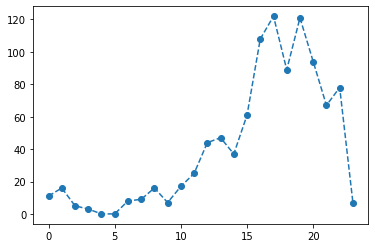

In [18]:
giorno = 8
plt.plot(X[:24],Y[24*(giorno-1):24*(giorno)],'o--')

### RANKING SMS

In [19]:
sms_total.sort_values(by="weight",ascending=False).head(10)

,sender,recipient,weight
543,279,617,1448.0
1110,617,279,1412.0
360,176,578,952.0
1051,578,176,812.0
896,481,296,515.0
47,21,20,486.0
181,91,90,409.0
175,90,91,370.0
572,296,481,349.0
277,137,136,307.0


In [20]:
df1 = sms_total.copy()
df1['sender'] = sms_total['recipient']
df1['recipient'] = sms_total['sender']


In [21]:
pd.concat([df1,sms_total],ignore_index=True).sort_values(by="weight",ascending=False).head(10)

,sender,recipient,weight
543,617,279,1448.0
1846,279,617,1448.0
2413,617,279,1412.0
1110,279,617,1412.0
360,578,176,952.0
1663,176,578,952.0
1051,176,578,812.0
2354,578,176,812.0
896,296,481,515.0
2199,481,296,515.0


## CALLS

In [29]:
df_calls = LoadData(DATA_FILENAMES["calls"], DATA_DIR)
DF_calls = df_calls
DF_calls["hour"] = DF_calls["timestamp"]// (3600)
DF_calls["day"] = DF_calls["timestamp"]// (3600*24) + 1
DF_calls["week"] = DF_calls["timestamp"]// (3600*24*7) + 1


DF_calls = DF_calls[DF_calls["duration"] != -1]
DF_calls

,timestamp,caller,callee,duration,hour,day,week
0,184,300,301,121,0,1,1
1,3920,512,299,670,1,1,1
2,5623,301,300,504,1,1,1
4,15466,512,0,5,4,1,1
5,15497,512,0,28,4,1,1
...,...,...,...,...,...,...,...
3595,2414934,706,401,78,670,28,4
3596,2415585,218,382,48,670,28,4
3597,2416059,561,631,13,671,28,4
3598,2416368,323,392,4,671,28,4


### DEGREE IN OUT

### WEEKLY 

Text(0.5, 0.98, 'SMS weekly distribution network')

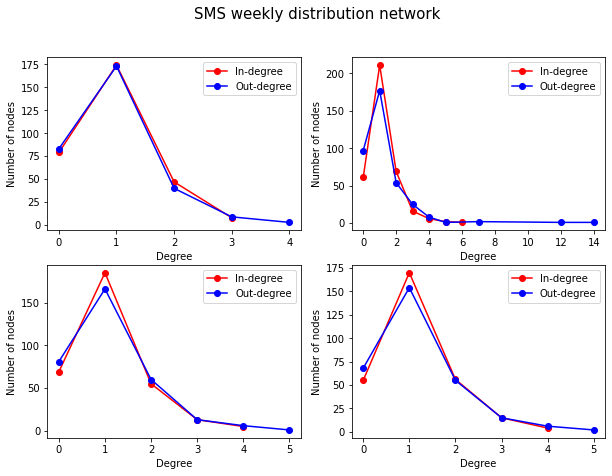

In [30]:
sms_week =  DF_calls[["caller","callee","week","duration"]].groupby(["caller","callee","week"]).sum().reset_index()
sms_week = sms_week.sort_values(by=['week']).reset_index(drop=True)
sms_week


fig, ax = plt.subplots(2,2,figsize=(10,7))

for i,a in enumerate(ax.flatten()):
    app = sms_week[sms_week["week"] == i+1]
    G_sms = nx.from_pandas_edgelist(app,
                    source='caller',target='callee',edge_attr='duration', create_using=nx.DiGraph())

    nnodes = G_sms.number_of_nodes()
    degrees_in = [d for n, d in G_sms.in_degree()]
    degrees_out = [d for n, d in G_sms.out_degree()]
    avrg_degree_in = sum(degrees_in) / float(nnodes)
    avrg_degree_out = sum(degrees_out) / float(nnodes)

    in_values = sorted(set(degrees_in))
    in_hist = [degrees_in.count(x) for x in in_values]
    out_values = sorted(set(degrees_out))
    out_hist = [degrees_out.count(x) for x in out_values]


    a.plot(in_values,in_hist,'ro-') # in-degree
    a.plot(out_values,out_hist,'bo-') # out-degree
    a.legend(['In-degree','Out-degree'])
    a.set_xlabel('Degree')
    a.set_ylabel('Number of nodes')
fig.suptitle('SMS weekly distribution network', fontsize=15)

### TOTAL

In [31]:
calls_total =  DF_calls[["caller","callee","duration"]].groupby(["caller","callee"]).sum().reset_index()
calls_total

,caller,callee,duration
0,0,208,180
1,0,512,3
2,3,48,34
3,3,49,25
4,3,357,104
...,...,...,...
876,830,257,4
877,845,228,29
878,845,256,48
879,846,191,23


Text(0.5, 1.0, 'calls total distribution network')

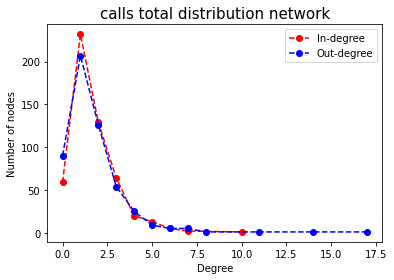

In [32]:
G_calls = nx.from_pandas_edgelist(calls_total,
                source='caller',target='callee',edge_attr='duration', create_using=nx.DiGraph())

nnodes = G_calls.number_of_nodes()
degrees_in = [d for n, d in G_calls.in_degree()]
degrees_out = [d for n, d in G_calls.out_degree()]
avrg_degree_in = sum(degrees_in) / float(nnodes)
avrg_degree_out = sum(degrees_out) / float(nnodes)

in_values = sorted(set(degrees_in))
in_hist = [degrees_in.count(x) for x in in_values]
out_values = sorted(set(degrees_out))
out_hist = [degrees_out.count(x) for x in out_values]


#plt.plot(in_values,sum(in_hist)-np.cumsum(in_hist),'ro--') # in-degree
#plt.plot(out_values,sum(out_hist)-np.cumsum(out_hist),'bo--') # out-degree

plt.plot(in_values,in_hist,'ro--') # in-degree
plt.plot(out_values,out_hist,'bo--') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('calls total distribution network', fontsize=15)


Text(0, 0.5, 'Number of component')

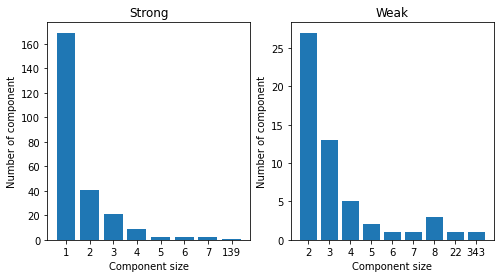

In [34]:
fig, ax = plt.subplots(1,2,figsize=(8,4))


strong_com = list(nx.strongly_connected_components(G_calls))
weak_com = list(nx.weakly_connected_components(G_calls))
strong = []
weak = []
for c in strong_com:
    strong.append(len(c))
for c in weak_com:
    weak.append(len(c))
x,y = np.unique(strong,return_counts=True)  
ax[0].bar([str(i) for i in x],y)
ax[0].set_title("Strong")
ax[0].set_xlabel("Component size")
ax[0].set_ylabel("Number of component")

x,y = np.unique(weak,return_counts=True)  
ax[1].bar([str(i) for i in x],y)
ax[1].set_title("Weak")
ax[1].set_xlabel("Component size")
ax[1].set_ylabel("Number of component")


## DEGREE CENTRALITY

In [35]:
deg = nx.degree_centrality(G_calls)
sorted(deg,key=deg.get,reverse=True)[:10]

[221, 263, 485, 401, 268, 69, 52, 49, 4, 13]

In [36]:
in_deg = nx.in_degree_centrality(G_calls)
sorted(in_deg,key=in_deg.get,reverse=True)[:10]

[401, 208, 268, 49, 485, 69, 682, 342, 4, 221]

In [37]:
out_deg = nx.out_degree_centrality(G_calls)
sorted(out_deg,key=out_deg.get,reverse=True)[:10]

[221, 263, 485, 52, 13, 401, 88, 677, 262, 4]

### RANKING SMS

In [38]:
calls_total.sort_values(by="duration",ascending=False).head(10)

,caller,callee,duration
188,136,137,8353
751,623,651,8060
659,522,436,5544
537,420,495,4850
635,495,420,4432
609,480,556,3862
711,578,289,3598
120,90,91,3513
60,39,622,3192
470,358,90,3086


In [40]:
df1 = calls_total.copy()
df1['caller'] = calls_total['callee']
df1['callee'] = calls_total['caller']


In [41]:
pd.concat([df1,calls_total],ignore_index=True).sort_values(by="duration",ascending=False).head(10)

,caller,callee,duration
188,137,136,8353
1069,136,137,8353
1632,623,651,8060
751,651,623,8060
659,436,522,5544
1540,522,436,5544
1418,420,495,4850
537,495,420,4850
635,420,495,4432
1516,495,420,4432


### CALLS TRAFFIC

In [59]:
DF_calls["weight"] = np.ones(len(DF_calls))

DF_calls

/tmp/ipykernel_6812/1319490097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_calls["weight"] = np.ones(len(DF_calls))


,timestamp,caller,callee,duration,hour,day,week,weight
0,184,300,301,121,0,1,1,1.0
1,3920,512,299,670,1,1,1,1.0
2,5623,301,300,504,1,1,1,1.0
4,15466,512,0,5,4,1,1,1.0
5,15497,512,0,28,4,1,1,1.0
...,...,...,...,...,...,...,...,...
3595,2414934,706,401,78,670,28,4,1.0
3596,2415585,218,382,48,670,28,4,1.0
3597,2416059,561,631,13,671,28,4,1.0
3598,2416368,323,392,4,671,28,4,1.0


In [60]:
traff = DF_calls[["hour","weight"]].groupby("hour").sum().reset_index()

traff

,hour,weight
0,0,1.0
1,1,2.0
2,4,2.0
3,7,1.0
4,8,1.0
...,...,...
497,667,3.0
498,668,12.0
499,669,6.0
500,670,4.0


In [62]:
x = traff.hour.values
y = traff.weight.values

X = []
Y = []
for i in range(672):
    X.append(i)
    if i in x:
        Y.append(y[x==i][0])
    else:
        Y.append(0)

In [84]:
marika = [
    "Domenica",
    "Lunedi'",
    "Martedi'",
    "Mercoledi",
    "Giovedi'",
    "Venerdi'",
    "Sabato"
]

/tmp/ipykernel_6812/1867625954.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


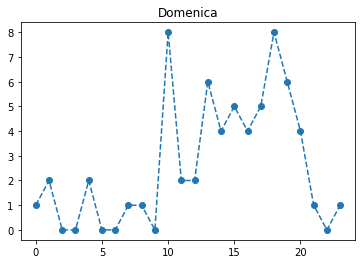

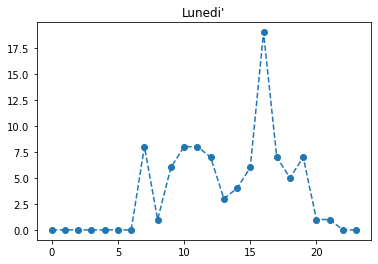

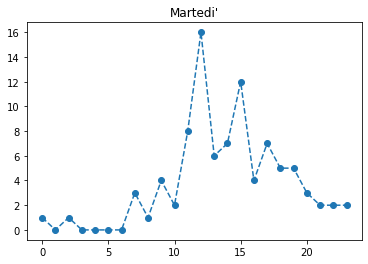

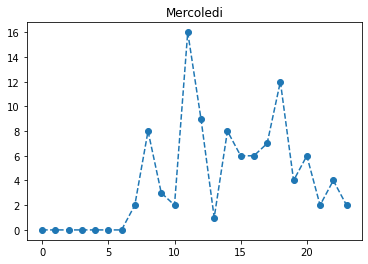

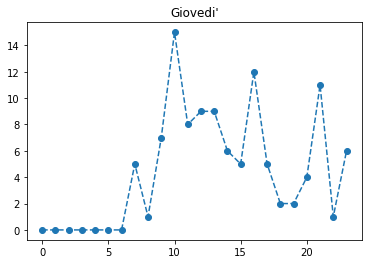

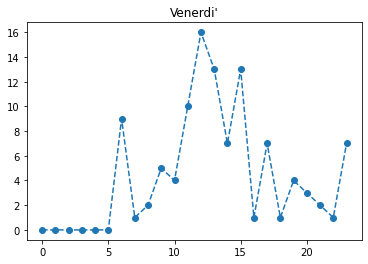

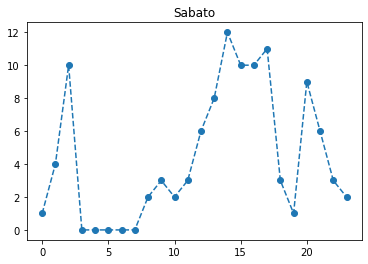

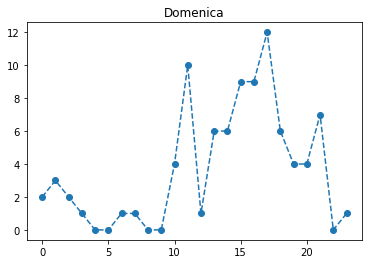

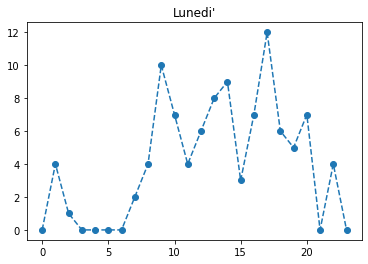

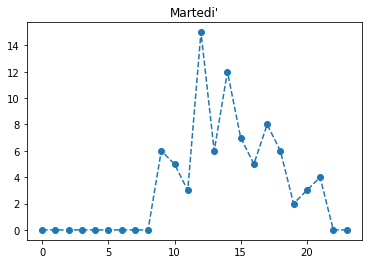

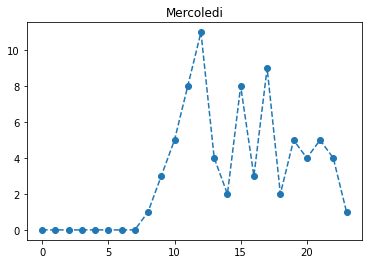

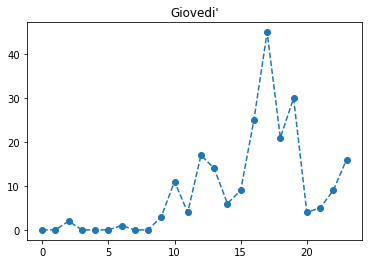

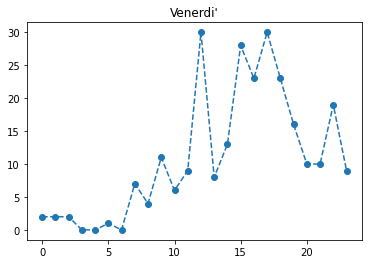

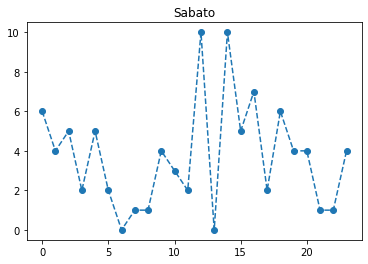

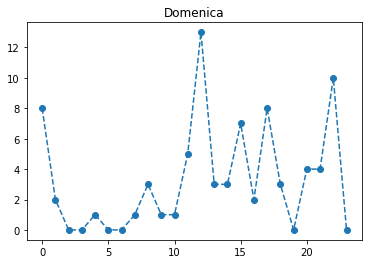

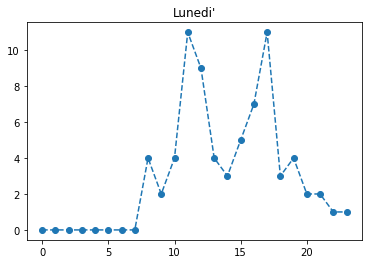

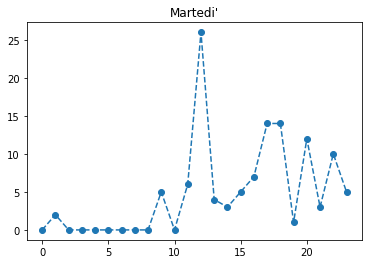

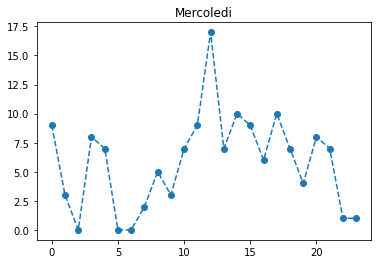

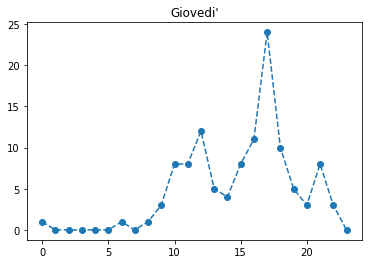

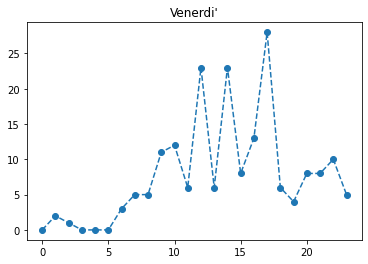

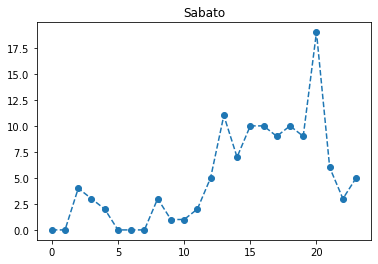

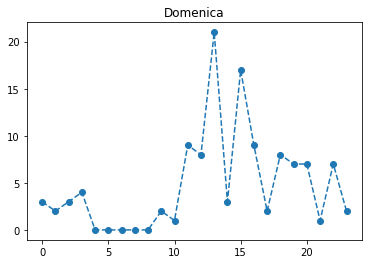

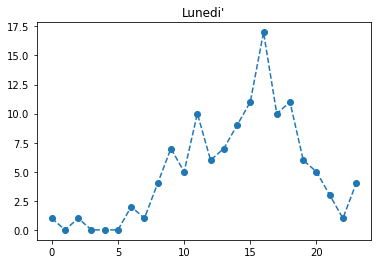

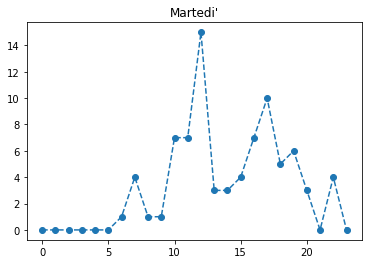

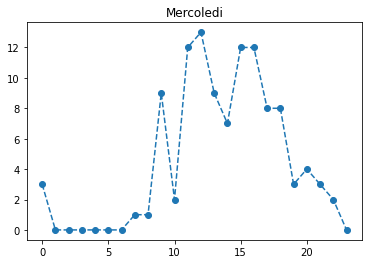

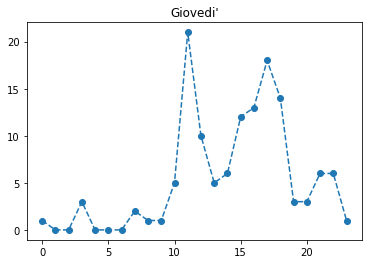

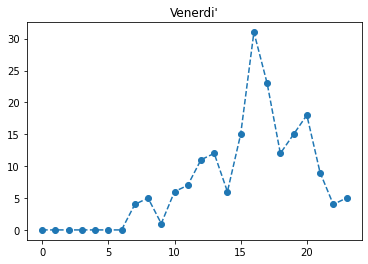

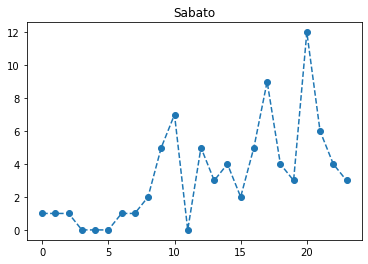

In [86]:
for giorno in range(28):
    giorno = giorno+1
    plt.figure()
    plt.plot(X[:24],Y[24*(giorno-1):24*(giorno)],'o--')
    plt.title(marika[(giorno-1)%7])